In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [20]:
df = pd.read_csv("data/data09.csv", delimiter=';')

In [21]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for index in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        

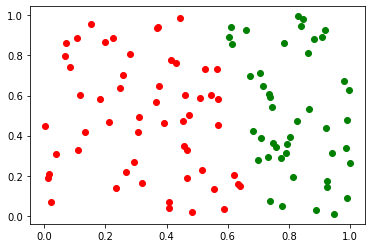

In [22]:
df_yes = df[df['Answer'] == 1]
df_no = df[df['Answer'] == 0]

plt.scatter(df_yes['Param1'], df_yes['Param2'], c='g')
plt.scatter(df_no['Param1'], df_no['Param2'], c='r')

plt.show()

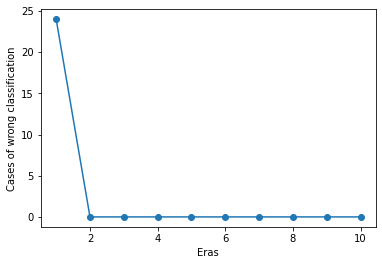

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df[['Param1', 'Param2']].values, df['Answer'], test_size=0.2)



perc = Perceptron(eta=0.1, n_iter=10)
perc.fit(x_train, y_train)
plt.plot(range(1, len(perc.errors_) + 1), perc.errors_, marker='o')
plt.xlabel('Eras')
plt.ylabel('Cases of wrong classification')
plt.show()

In [24]:
res_arr = perc.predict(x_test)

print(res_arr)
print(np.array(y_test))


[0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0]


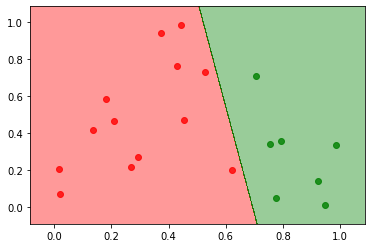

In [25]:
def get_regions(x_test, y_test, perc, resolution = 0.001):
    markers = ('o', 'o')
    colors = ('r', 'g', 'g', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    
    x1_min, x1_max = x_test[:, 0].min() - 0.1, x_test[:, 0].max() + 0.1
    x2_min, x2_max = x_test[:, 1].min() - 0.1, x_test[:, 1].max() + 0.1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    Z = perc.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x=x_test[y_test == cl, 0], y=x_test[y_test == cl, 1],
                   alpha=0.8, color=cmap(idx), marker=markers[idx], label=cl)
    

get_regions(x_test, y_test, perc)
plt.show()